# ***Szkolenie ML/AI 4***
### ***Sztuczne sieci neuronowe***

<div style="text-align: right;">
<small>Made by Aleksander Kołodziejczyk</small>
</div>

<div style="text-align: right;">
<small>Zdjęcia i materiały z "Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow, Autor: Aurelien Geron</small>
</div>

Sztuczne sieci neuronowe po raz pierwszy zaprezentowane zostały w 1943 roku w artukule *A Logical Calculus of Ideas Immanent in Nervous Activity*. Neurofizjolog Warren McCulloch i matematyk Walter Pitts ukazali uproszczony model działania zespołu neuronów i opisali pierwszą architekturę sztucznej sieci neuronowej (ang. *Artificial neural network*). W tym czasie nastąpiła ekspozja zainteresowaniem sztczną inteligencją, która szybko zgasła.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

### Jak działa neuron biologiczny?

Neurony biologiczne otrzmują z innych neuronów impulsy elektryczne (tzw. sygnały) poprzez synapsy. Gdy komórka nerwowa otrzyma dostateczną ilość sygnałów od innch neuronów w ciągu kilku milisekund to sama zaczyna wysyłać własne sygnały.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_2.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Sztuczny neuron ma co najmniej jedno binarne (0 lub 1) wejście i tylko jedno wyjście binarne. Twórcy modelu udowodnili, że za pomocą sieci takich nauronów można rozwiązać dowolne zadanie logiczne.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_3.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

### Perceptron 

Perceptron stanowi jedną z najprostszych architektur SSN. Został on zaprezentowany w 1957 roku przez Franka Rosenblatta. Jego podstawę stanowi nieco zmodyfikowany sztuczny neuron z wany **jednostką liniową z progiem** (ang. *linear treshold unit - LTU*), dzięki czemu wartościami wejść/wyjść są wartości liczbowe, a nie binarne, a każde połączenie ma przyporządkowaną wagę. Jednostkę LTU wylicza sumę ważoną sygnałów wejściowych $z = w_1 * x_1 + w_2 * x_2 + w_n * x_n$ ($w^T * x$), a następnie wobec tej sumy zostaje użyta funkcja skokowa dając ostateczny wynik.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_4.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/Heaviside.png" alt="drawing" style="width:350px;"/>
</div>
Funkcja skokowa Heaviside'a
<br>

Warto wspomnieć o tym, że pojedyncza jednostka LTU może rozwiązywać zadania prostej klasyfikacji (należy pamiętać o dodaniu cechy obiążenia x0)

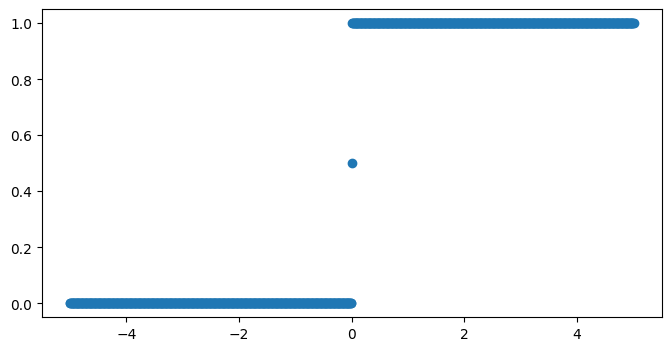

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1001)
y = []

for i in range(len(x)):
    if x[i] < 0: y.append(0)
    elif x[i] > 0: y.append(1)
    else: y.append(0.5)

plt.figure(figsize=(8,4))
plt.scatter(x,y)


# print(x)
# print(x.shape)

Perceptron składa się z jednej warstwy jednostek LTU, gdzie każdy neuron jest połączony ze wszystkimy wejściami. Połączenia te są reprezentowane często przez neurony zwane neuronami wejściowymi (ang. *input neuron*). Przekazują one dane wejściowe. Często dodawany jest również dodatkowe obiążenie (x0 = 1), cecha ta jest reprezentowana przez tzw. neuron obciążeniowy. Jego zadaniem jest po prostu przesłanie na wyjście wartości 1.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_5.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

### Ćwiczenie

Policz wartości w sieci neuronowej:

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/zad_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Funkcja aktywacji dla: 

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/sig.png" alt="drawing" style="width:600px;"/>
</div>

<br>

Rozwiązanie na kartce:

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/zad_2.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Nauczenie perceptronu polega na doborze odpowiednich wag:

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_2_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Granica decyzyjna dla każdego neuronu wyjściowego jest jest **liniowa**, dlatego perceptron nie jest w stanie nauczyć się skomplikowanych wzorców. Rosenblatt udowodnił, że jeżeli próbki uczące będą liniowo rozdzielne to algorytm osiągnie zbieżność.

Problem z XOR

In [3]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initializing weights randomly
weights_input_hidden = np.array([0.25, 0.3, 0.15, 0.7]).reshape(2, 2)
weights_hidden_output = np.array([0.5, 0.75]).reshape(2, 1)

# Example inputs (2 features) and target output
inputs = np.array([[1, 1]])

# Target outputs (one output node)
outputs = np.array([[1]])

# Displaying results
print(f"\nWeights between Input and Hidden layer: {weights_input_hidden}")
print(f"\nWeights between Hidden and Output layer: {weights_hidden_output}")

# Feedforward propagation
hidden_layer_input = np.dot(inputs, weights_input_hidden)
print(f"\nHidden layer input: {hidden_layer_input}")
hidden_layer_output = sigmoid(hidden_layer_input)
print(f"\nHidden layer output: {hidden_layer_output}")

final_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
print(f"\nFinal layer input: {final_layer_input}")
predicted_output = sigmoid(final_layer_input)
print(f"\nFinal layer output: {predicted_output}")

print(f"\nFinal output: {predicted_output}")


Weights between Input and Hidden layer: [[0.25 0.3 ]
 [0.15 0.7 ]]

Weights between Hidden and Output layer: [[0.5 ]
 [0.75]]

Hidden layer input: [[0.4 1. ]]

Hidden layer output: [[0.59868766 0.73105858]]

Final layer input: [[0.84763776]]

Final layer output: [[0.70007137]]

Final output: [[0.70007137]]


Wiele ograniczeń perceptronu wyeliminować można poprzez stworzenie wielu warstw perceptronów, tego typu architekturę nazywa się perceptronem wielowarstwowym (ang. *multi-layer perceptron - MLP*) 

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_6.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Perceptron wielowarstwowy składa się z: 
- jednej warstwy wejściowej (przechodnej)
- co najmniej jednej warsty ukrytej (składającej się z jednosek/jednostki LTU)
- jednej warstwy wyjściowej (składającej się z jednosek/jednostki LTU)

<br>

Oprócz warstwy wyjściowej każda warstwa może mieć (zwykle ma) neuron obciążający oraz jest w pełni połączona z następną warstwą.

Gdy sieć SSN zawiera przynajmniej dwie warstwy ukryte to nosi nazwę głębokiej sieci neuronowej GSN (ang. *deep neural network - DNN*)

Dopiero w 1986 roku D.E. Rumelhart i in. opublikowali artykuł o koncepcji algorytmu wstecznej propagacji (ang. *backpropagation*).

Algorytm pobiera każdy przykład uczący do sieci i oblicza wynik wszystkich neuronów w każdej warstwie. Następnie liczony jest błąd na wyjściu sieci ($y^* - y$), a także wpływ każdego neuronu w warstwie na błędny wynik. W dalszej kolejności mierzony jest wpływ neuronów ze wcześniejszej warstwy itd. Taki odwrotny przebieg skutecznie mierzy gradient błędu we wszystkich wagach połączeń porzez propagację tego gradientu w kierunku początku sieci. Ostatnim elementem algorytmu propagacji jest mechanizm gradientu prostego wobec wszystkich wag połączeń w sieci za pomocą zmierzonego wcześniej gradientu błędu.

http://galaxy.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html

Aby algorytm działał prawidłowo, twórcy musieli zastąpić funkcję skokową funkcją logistyczną (zdjęcia na górze).
Zaczęto również testować inne funckje:

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_8.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>


Perceptron wielowarstwowy często jest używany w zadaniach klasyfikacji, gdzie każde wyjście odpowiada innej klasie binarnej. Gdy klasy się wzajemnie wykluczają (np. irysy), warstwa wyjściowa zostaje zmodyfikowana w taki sposób, że funkcje aktywacji zastępowane są współdzieloną funkcją typu softmax. Jeśli sygnał biegnie tylko w jednym kierunku (od wejścia do wyjścia) to taka architektura nazywa się jednokierunkową siecią neuronową (ang. *feedfoward neural network*).

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/10_9.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Jak powinna wyglądać topologia sieci?
- topologia sieci już sama w sobie jest hiperparametrem, zbyt uboga - niedouczenie, zbyt skomplikowana - długie czasy obliczeń, większa szansa na przeuczenie.

Ile ukrytych warstw?
- teoretycznie jedna warstwa ukryta wystarczy (pod warunkiem, że ma wystarczającą ilość neuronów), ale sieci głębokie mają dużą większą efektywność parametrów od sieci płytkich (neurony w warstwach często "wykrywają" własności od szczegółu do ogółu). Lepiej więc dodać więcej warstw z mniejszą ilością neuronów.

Ile neuronów ma tworzyć warstwę ukrytą?
- Warstwa wejściowa jest uzależniona od kształtu danych. Na wejście tyle neuronów ile wejść, a na wyjściu tyle klas czy wartości ile potrzebujemy do rozwiązania problemu. Na przykład w irysach potrzeba 4 neurony wejściowe i 3 wyjściowe (z funkją softmax na końcu). W przypadku warstw ukrytych częstym rozwiązaniem jest podejście lejkowe, gdzie ilość neuronów w wastwach się stopniowo zmniejsza np. podzielić na dwa. Inną techniką jest stosowanie takiej samej ilości neuronów w warstwach ukrytych (ich regulację określa wtedy tylko jeden hiperparametr). 
- Najprostszym rozwiązaniem jest wybór sieci zawierającej więcej neuronów i warstw niż to potrzebne, a następnie skorzystanie z regulacji wczesnego zatrzymania. Strategia ta nosi nazwę "rozciągliwych portek" (ang. *stretch pants*).

Jakie funkcje aktywacji użyć?
- W większości przypadków używa się modyfikacji sieci ReLU. Jest nieco szybsza od pozostałych funkcji aktywacji, a algorytm gradientu prostego nie zatrzymuje się tak często na wypłaszczeniach. 
- W przypadku funkcji wyjściowych, klasyfikacja -> softmax, regresja -> nie potrzeba funkcji aktywacji na wyjściu

### Poblem zanikających/eksplodujących gradientów

Wartości gradientów często maleją wraz z przebiegiem algorytmu propagacji wstecznej do niższych warstw sieci. Wskutek tego, wagi nie są znacznie aktualizowane co uniemożliwia sieci osiągnięcia zbieżności. Jest to problem zanikających gradientów (ang. *vanishing gradients*). W niektórych sytuacjach następuje inne zjawisko podczas którego gradienty aktualizowane są w szalonym tempie (ale algorytm staje się rozbieżny), czyli problem eksplodujących gradientów (ang. *exploding gradients*). Ogólnie mówiąc, sieci neuronowe cieprią na syndrom niestabilnych gradientów, poszczególne warstwy mogą uczyć się w diametralnie innym tempie. 

Problem ten był przez długi czas ignorowany i dopiero w 2010 roku Xavier Glorot i Yoshua Bengio wykryli "podejrzane" miejsca.

Mianowicie kombinację logistycznej, sigmoidalnej funkcji aktywacji z losowo inicjalizowanymi wagami (rozkład normalny o średniej równej zero i odchyleniem standardowyn równym 1). Podczas przebiegu naprzód wariancja każdej następnej warstwy jest większa, aż do momentu przesycenia funkcji. 

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Problem ten należy rozwiązać inicjując wagi następująco (inicjalizacja wag Xaviera lub Glorota):

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_1_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Po pewnym czasie oderwano się od połączeń do ludzkiego mózgu i zaczęto stosować inne funkcje aktywacji. Tą która radziła sobie lepiej była ReLU (ang. *rectified linear unit*). Radziła sobie lepiej, ponieważ nie ulegała nasyceniu dla dodatnich wartości (i zmniejszyła czas obliczeń).

Funkcja ReLU też nie jest idealna, istnieje coś takiego jak śmierć ReLU (ang. *dying ReLU*). W czasie nauki niektóre neurony giną, co oznacza że na wyjście wysyłają jedynie 0.

W celu uniknięcia tego zjawiska zastosowano tzw. przeciekającą fukncję ReLU (ang. *leaky relu*)

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_2.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Kolejną poprawą była funkcja jednostkowo wykładniczo-liniowa (ang. *exponential linear unit - ELU*).

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_3.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Czas nauki dla niej był krótszy, ponieważ funkcja jest gładka również w punkcie x = 0

Natomiast głównym jej problemem jest dłuższy czas obliczeń ze względu na obecność składowej wykładniczej. Sieć ELU będzie wolniejsza od ReLU. 

### Normalizacja wsadowa

Sama losowa inicjalizacja wag redukuje problem zanikających/eksplodujących gradientów na początku procesu uczenia, jednak nie zapewnia tej ochrony w późniejszym czasie.

W publikacji w 2015 roku Sergey Ioffe i Christian Szegedy zaproponowali technikę zwaną normalizacją wsadową (ang. *batch normalisation* - BN). Jako rozwiązanie problemu rozkładu zmian wejść w każdej warstwie podczas uczenia.

Technika ta polega na wstawieniu operacji do modelu tuż przed funkcją aktywacji w każdej warstwie, wyśrodkowaniu i znormalizowaniu danych wejściowych, a następnie przeskalowaniu i przesunięciu wyniku za pomocą dwóch parametrów (jeden odpowiada za skalowanie, a drugi za przesunięcie)

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_3_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Technika ta mocno redukuje problem zanikających gradientów, do tego stopnia, że pod uwagę można zacząć brać tangens hiperboliczny, a nawet funkcję logistyczną. Sieci okazały się również o wiele mniej wrażliwe na losową inicjalizację wag. Wszystko to oczywiście za większą złożoność obliczeniową (ale sama sieć powinna zbiegać szybciej do optimum)

<br>
<br>

**Obcinanie gradientu** - technika polega na ograniczaniu gradientów na etapie propagacji wstecznej w taki sposób, aby nie przekraczały określonego progu. Zdecydowanie bardziej polecana jest normalizacja wsadowa.

### Szybsze optymalizatory

Przy bardzo głębokich sieciach uczenie może być bardzo czasochłonne. Kolejnym czynnikiem przyspieszającym naukę jest dobór optymalizatora (coś lepszego niż algorytm gradientu prostego -> jego modyfikacje)

<br>

**Optymalizacja momentum** (ang. *momentum optimization*) - do algorytmu gradientu prostego dołączany jest człon wektora momentu **m**

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_4_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

**Przyspieszony spadek wzdłuż gradientu (alogrytm Nesterova)** (ang. *Nesterov momentum optimization* / *Nesterov accelerated gradient* - NAG) - jest to pomiar gradientu funkcji kosztu nie w miejscu lokalnej pozycji, lecz nieco z przodu w kierunku (zwrotu) pędu. Jedyną różnicą w porównaniu do algorytmu optymalizacji momentu to pomiar gradientu za pomocą wyrażenia $\theta + \beta m$, a nie $\theta$

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_6.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

**AdaGrad** (ang. *Adaptive Gradient Algorithm*) - algorytm wcześnmiej wykrywający zmianę kierunku i samokorygujący w stronę minimum. Algorytm redukuje współczynnik uczenia, ale dokonuje tego szybciej dla wymiarów o stromym przebiegu funkcji niż dla wymiarów o łagodnym przebiegu. Jest to tak zwany adaptacyjny współczynnik uczenia (ang. *adaptive learning rate*). Uwaga, przez to, że metoda jest adaptacyjna to jest bardziej narażona na utknięcie w minimum lokalnym. 

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_6_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_7.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

**RMSProp** - Algorytm AdaGrad zwalnia nieco zbyt szybko i kończy działanie, nigdy nie osiągając zbieżności z minimum globalnym. Problem ten rozwiązuje algorytm RMSProp (ciekawostka jest taka, że sam algorytm nigdy nie został opisany w żadnej publikacji, tylko na prezentacji, dlatego badacze odnosząc się do źródła używają zapisu "slajd 29 na wykładzie 6"), poprzez gromadzenie wyłącznie gradientów z najbardziej aktualnych przebiegów, a nie wszystkich gradientów od początku nauki. Dokonuje tego poprzez przeprowadzenie rozkładu wykładniczego na pierwszym etapie.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_7_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

**Optymalizacja Adam** szacowanie adaptacyjnego momentu (ang. *adaptive moment estimation*) - łączy koncepcję optymalizacji momentum i optymalizatora RMSProp, z tego pierwszego używa śledzenie rozkładu wykładniczego średniej wcześniejszych gradientów, a z drugiego śledzenie rozkładu wykładniczego średniej wcześniejszych kwadratów gradientów.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_8_1.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_8_2.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Etapy 3, 4 są techniczne ponieważ wektory **m** i **s** są inicjalizowane z wartością 0, więc na początku będą obciążone w kierunku zera. 

***UWAGA*** Optymalizacja ADAM obecnie jest uważana za najlepszą, natomiast artykuł z 2017 roku udowodnił, że adaptacyjne techniki optymalizacji mogą prowadzić do rozwiązań które niezbyt sobie radzą z niektórymi zbiorami danych. Problem ten nie występuje np w algorytmie Nesterova.

Warto dodać, że wszystkie te techniki oparte są o pochodne pierwszego rzędu (jakobianach), można znaleźć inne algorytmy bazujące na pochodnych drugiego rzędu (hesjanach), ale tutaj złożoność obliczeniowa rośnie na każde wyjście przypada $n^2$ hesjanów (gdzie n to liczba parametrów), w przeciwieństwie do n jakobianów. Przeciętna głeboka sieć neuronowa ma dziesiątki tysiące parametrów, dlatego algorytmy optymalizacji często nie mieszczą się nawet w pamięci maszyny, a te które się mieszczą po prostu są zbyt wolne.

<br>

**Harmonogramowanie współczynnika uczenia**

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_8.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

- **odgórny, przedziałowy, stały współczynnik uczenia** (ang. *predetermined piercewise constant learning rate*) - na przykład, początkowo wartość współczynnika uczenia n0 = 0,1 a po 50 epokach zmniejszamy go do wartości n1 = 0,001. Rozwiązanie bywa znakomite, ale często wymaga dodatkowego ustalania wartości oraz momentu zmiany

- **Harmonogramowanie wydajnościowe** (ang. *performance scheduling*) - mierzymy błąd walidacji co N przebiegów (jak w metodzie wczesnego zatrzymania) i w momencie gdy wartość błędu przestaje maleć następuje redukcja parametru learning rate o wartość h

- **Harmonogramowanie wykładnicze** (ang. *exponential scheduling*) - wyznacza się współczynnik uczenia na podstawie funkcji liczby przebiegów $t = \mu(t) = \mu_0 10^{-t/r}$, wartość współczynnika uczenia będzie maleć dziesięciokrotnie co r przebiegów

- **Harmonogramowanie potęgowe** (ang. *power scheduling*) - wyznacza się współczynnik uczenia na podstawie funkcji $\mu(t) = \mu_0 (1+t/r)^{-c}$. Hiperparametr c ma zwykle wartość 1. Metoda przypomina harmonogramowanie wykładnicze, ale maleje wolniej.

Udowodniono, że podczas nauki sieci głębokich za pomocą optymalizacji momentum najlepiej stwierdziły się zarówno harmonogramy wydajnościowe, jak i wykładnicze (z czego te drugie lepiej z powodu łatwiejszej implementacji, strojenia i nieco większej szybkości w uzyskaniu zbieżności). 

### Regularyzacja

<br>

**Wczesne zatrzymanie** - ...

<br>

**Regularyzacja l1 i l2** - ...

<br>

**Porzucanie** (ang. *dropout*) - prawdopodobnie najpopularniejsza technika regularyzacji. Używana obecnie nawet w najnowszych sieciach neuronowych. Algorytm ten jest dość trywialny. W poszczególnych przebiegach uczenia neuron (oprócz warstwy wejściowej) może zostać tymczasowo porzucony tzn. całkowicie pominięty w procesie uczenia, ale w każdym z przebiegów może znów być aktywny. Hiperparametr p nosi nazwę współczynnika porzucenia (ang. *dropout rate*). I zazwyczaj ma przyporząądkowaną wartość 50%. Po zakończeniu nauki neurony przestają być porzucane.

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_9.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Zakładając, że p = 50% to neuron w trakcie testowania będzie podłączony (średnio) do dwukrotnie większej ilości neuronów niż podczas nauki. Aby zrównoważyć te zjawisko należy pomnożyć wagi wejściowe neuronów przez prawdopodobieństwo zatrzymania (ang. *keep probability*) 1 - p.

<br>

**max-norm** wagi każdego nauronu są regularyzowane tak, że ||w|| < r, gdzie r to hiperparametr metody max-norm, a ||.|| członem regularyzacji l2. W skrócie ucina się wagi które przekraczają dany próg. 

<br>

**Dogenerowanie danych** (ang. *data augmentation*) - polega na tworzeniu nowych próbek uczących z już istniejących. 

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/11_10.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>


### Model rzadki

Wcześniej wspomniane algorytmy optymalizacyjne generują modele **gęste**, co oznacza, że większość parametrów przyjmuje niezerowe wartości. Jeśli potrzeba szybkiego modelu lub mamy mało pamięci to lepszym rozwiązaniem jest uzyskanie modelu rzadkiego, czyli takiego w którym parametry np < 0,01 są zmieniane na 0 (występuje więcej zer w parametrach). Inną możliwością jest wprowadzenie silnej regularyzacji l1. 

### Podejście praktyczne 

- Jeśli nie możesz znaleźć optymalnej wartości współczynnika uczenia (model nie osiąga zbieżności zbyt szybko), można spróbować dodać harmonogram uczenia
- Jeśli zbiór uczący jest zbyt mały można skorzystać z metody dogenerowania danych
- Jeśli należy uzyskać rzadki model należy wprowadzenic regularyzację l1 lub sprowadzać niskie wartości wag do 0
- Jeśli potrzeba szybkiego modelu należy zrezyknować z normalizacji wsadowej i np zastąpić funkcję aktywacji ELU przeciekającą funkcją ReLU (oraz wprowadzić model rzadki)

### Splotowe sieci neuronowe (ang. *convolutional neural network*)

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/CNN.jpeg" alt="drawing" style="width:900px;"/>
</div>

<br>


https://poloclub.github.io/cnn-explainer/

https://adamharley.com/nn_vis/cnn/3d.html

### Rekurencyjne sieci neuronowe (ang. *recurrent neural network*)

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/RNN.png" alt="drawing" style="width:900px;"/>
</div>

<br>

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_4/RNN_2.png" alt="drawing" style="width:900px;"/>
</div>

<br>

https://joshvarty.github.io/VisualizingRNNs/

* Sieci Hopfielda
* Maszyny Boltzmanna
* Sieci przekonań
* Mapy samoorganizujące
* Sieci grafowe